# Gender Age Detection using OpenCv

In [1]:
!pip install opencv-python numpy

In [2]:
import cv2
import math
import argparse
parser = argparse.ArgumentParser()
from IPython.display import display, Image

In [3]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


In [4]:
import argparse
import sys

# Check if running in a Jupyter notebook
if 'ipykernel' in sys.modules:
    # Filter out the kernel-related arguments
    kernel_args = sys.argv[1:]
    sys.argv = [arg for arg in sys.argv if arg not in kernel_args]

parser = argparse.ArgumentParser()
parser.add_argument('--image', help='path to image')
args = parser.parse_args()


In [5]:
faceProto="opencv_face_detector.pbtxt"
faceModel="opencv_face_detector_uint8.pb"
ageProto="age_deploy.prototxt"
ageModel="age_net.caffemodel"
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

In [6]:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']


In [7]:
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

In [8]:
video=cv2.VideoCapture(args.image if args.image else 0)
padding=20


Gender: Male, Age: 38-43 years


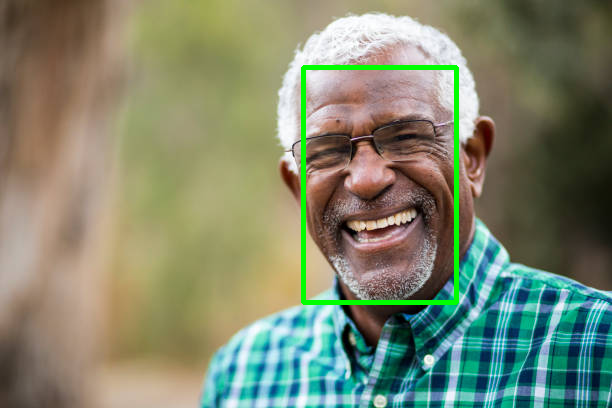

In [10]:
image_path = "man1.jpg"
image = cv2.imread(image_path)

# Padding for face extraction
padding = 20

# Perform face detection
resultImg, faceBoxes = highlightFace(faceNet, image)

if not faceBoxes:
    print("No face detected in the image.")
else:
    for faceBox in faceBoxes:
        face = image[max(0, faceBox[1] - padding): min(faceBox[3] + padding, image.shape[0] - 1),
                     max(0, faceBox[0] - padding): min(faceBox[2] + padding, image.shape[1] - 1)]

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = "Male" if genderPreds[0].argmax() == 0 else "Female"

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        # Print gender and age information
        print(f'Gender: {gender}, Age: {age[1:-1]} years')

    # Display the result image below the cell
    display(Image(data=cv2.imencode('.png', resultImg)[1].tobytes()))